In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import matplotlib
%matplotlib inline

In [3]:
df= pd.read_csv("Bengaluru_House_Data.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.info

<bound method DataFrame.info of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.

In [13]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [23]:
df2=df.drop(['society','availability'],axis='columns')

In [24]:
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [25]:
df2.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [27]:
df2=df2.drop(['balcony'],axis='columns')

In [28]:
df3=df2.dropna()

In [29]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [31]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\kumar\AppData\Local\Temp\ipykernel_19460\2989175054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [35]:
df4=df3.drop(['size'],axis='columns')


In [36]:
df4.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2


In [37]:
df4.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [38]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [40]:
df4[~df4['total_sqft'].apply(is_float)].head(10)

,area_type,location,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,1195 - 1440,2.0,63.770,2
648,Built-up Area,Arekere,4125Perch,9.0,265.000,9
661,Super built-up Area,Yelahanka,1120 - 1145,2.0,48.130,2
672,Built-up Area,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [41]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [42]:
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4


In [43]:
df5=df4.copy()

In [46]:

df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [48]:
len(df5.area_type.unique())

4

In [51]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [52]:
len(location_stats[location_stats<=10])

1047

In [53]:
location_stats_less_than_10=location_stats[location_stats<=10]

In [55]:
df5.location=df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)

In [56]:
df5.head()

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [57]:
df5.head()

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [64]:
df5.shape

(13200, 7)

In [58]:
df5[df5.total_sqft/df5.bhk<300].head(20)

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,other,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,500.0,3.0,100.0,3,20000.000000
78,Built-up Area,Kaval Byrasandra,460.0,1.0,22.0,2,4782.608696
89,Plot Area,Rajaji Nagar,710.0,6.0,160.0,6,22535.211268
119,Plot Area,Hennur Road,276.0,3.0,23.0,2,8333.333333
129,Plot Area,Vishwapriya Layout,950.0,7.0,115.0,7,12105.263158
149,Plot Area,other,1034.0,5.0,185.0,6,17891.682785


In [62]:
df6=df5[(df5.total_sqft/df5.bhk>300)]

In [63]:
df6.shape

(12274, 7)

In [65]:
df6.price_per_sqft.describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

In [66]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10018, 7)

Text(0, 0.5, 'Count')

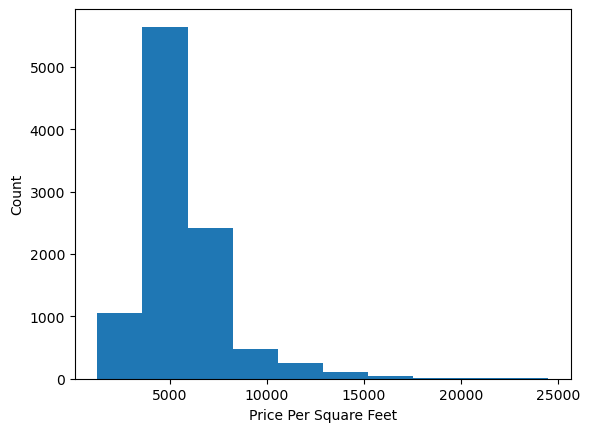

In [69]:
plt.hist(df7.price_per_sqft,rwidth=1)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [92]:
df9 = df7[df7.bath<df7.bhk+2]
df9.shape

(9927, 7)

In [93]:
df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head(3)    

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3


In [99]:
df10.shape

(9927, 6)

In [94]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [95]:
dummies2 = pd.get_dummies(df10.area_type)
dummies2.head(3)
df10['area_type'].unique()

array(['Super built-up  Area', 'Built-up  Area', 'Plot  Area',
       'Carpet  Area'], dtype=object)

In [100]:
df11 = pd.concat([df10, dummies.drop('other', axis='columns'), dummies2.drop('Plot  Area', axis='columns')],axis=1)
df11.head()

,area_type,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Super built-up Area
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [101]:
df12 = df11.drop(['location','area_type'],axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Super built-up Area
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [102]:
df12.shape

(9927, 247)

In [103]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Super built-up Area
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [104]:
y = df12.price


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [106]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.782967941161527

In [107]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.81861749, 0.81541031, 0.80082137, 0.84949375, 0.74986123])

In [113]:
df10.columns

Index(['area_type', 'location', 'total_sqft', 'bath', 'price', 'bhk'], dtype='object')

In [116]:
df10.head()
df10['area_type'].unique()

array(['Super built-up  Area', 'Built-up  Area', 'Plot  Area',
       'Carpet  Area'], dtype=object)

In [114]:
def predict_price(location,sqft,bath,bhk,area_type):    
    loc_index = np.where(X.columns==location)[0][0]
    area_index = np.where(X.columns==area_type)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    if area_index >=0:
        x[area_index] = 1

    return lr_clf.predict([x])[0]

In [117]:
predict_price('1st Phase JP Nagar',1000, 2, 2,'Super built-up  Area')

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.22774109698445

In [119]:
predict_price('1st Phase JP Nagar',1000, 2, 2,'Built-up  Area')

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.53472806707275

In [120]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [121]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))